# EDA On Titanic DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [2]:
df = pd.read_csv( 'train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* We drop the column 'PassengerId'

In [3]:
df.drop('PassengerId', axis = 1, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Univarite Analysis of Age

In [7]:
df['Age'].isnull().sum()

177

* 177 out of 891 values are missing in the age column

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

* Mean = 29.699
* Median = 28
* Mode is non necessary for numerical data

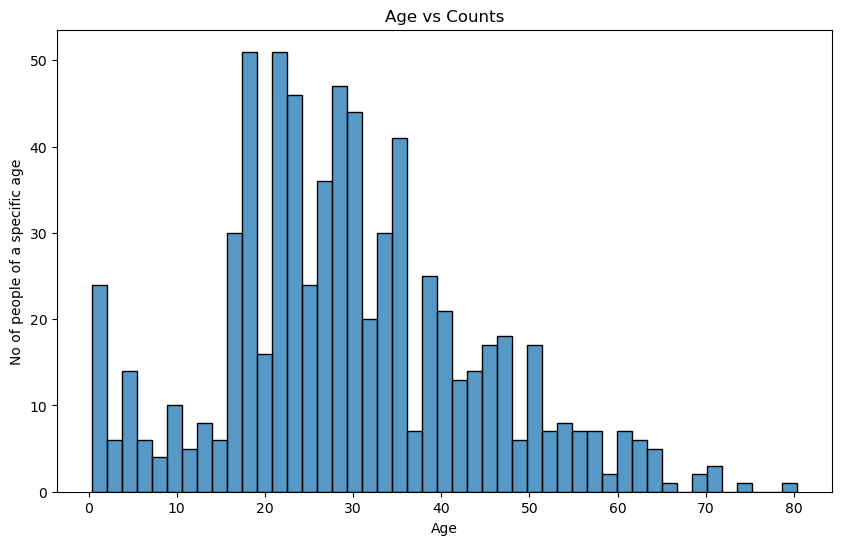

In [25]:
plt.rcParams['figure.figsize'] = (10,6)
sns.histplot(x='Age', data = df, binwidth = 1.7)
plt.title('Age vs Counts')
plt.xlabel('Age')
plt.ylabel('No of people of a specific age')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

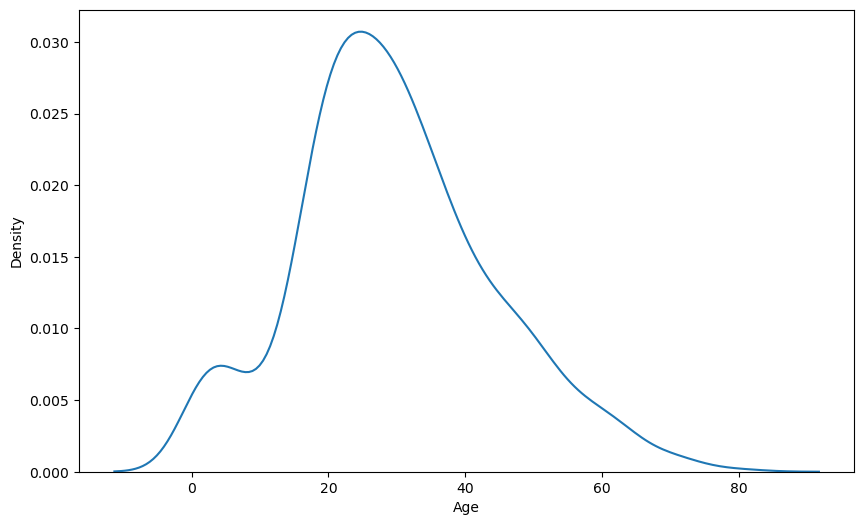

In [27]:
sns.kdeplot(data = df, x = 'Age')

In [28]:
df['Age'].skew()

0.38910778230082704

* Nearly Normally distributed Data( low skewness)

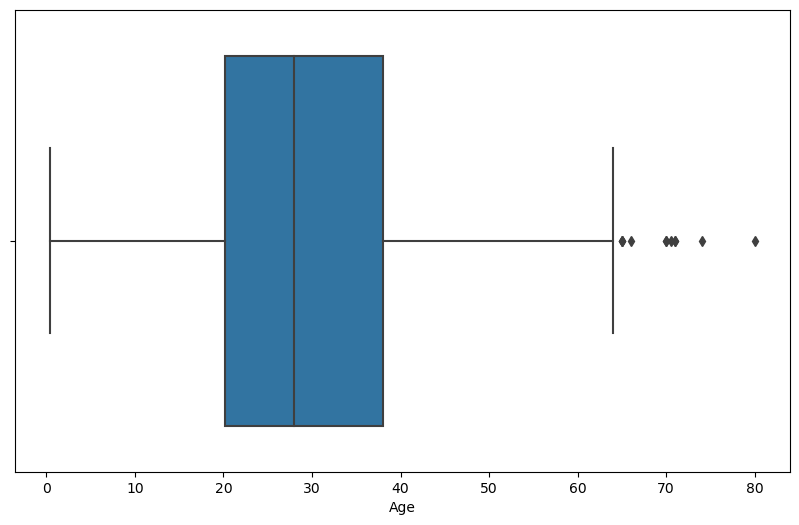

In [30]:
sns.boxplot(x='Age', data = df)
plt.show()

In [31]:
df[df['Age']>65]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


* We can notice the presence of Outliers of very high age
* But for the column age, we see that it is perfectly valid to have outliers

## UniVariate Analysis of Fare

In [35]:
df['Fare'].isnull().sum()

0

* Good that we have no missing values

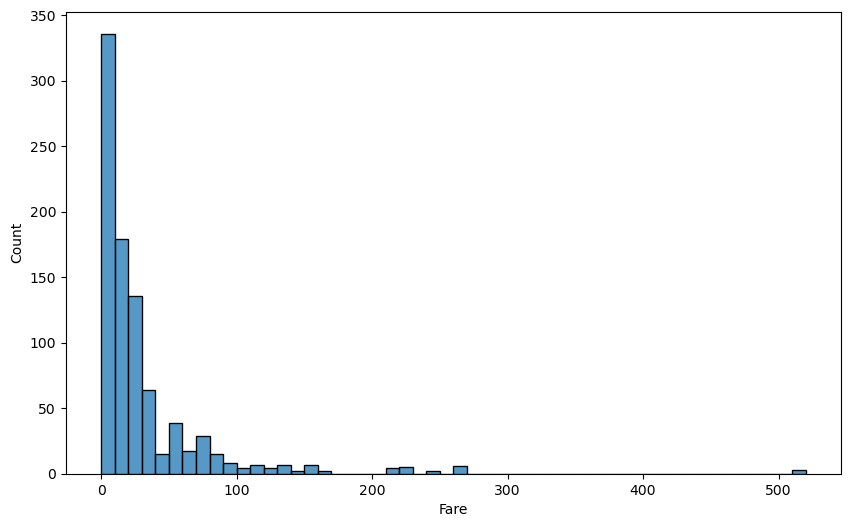

In [34]:

sns.histplot(x='Fare', data = df, binwidth =10)
plt.show()

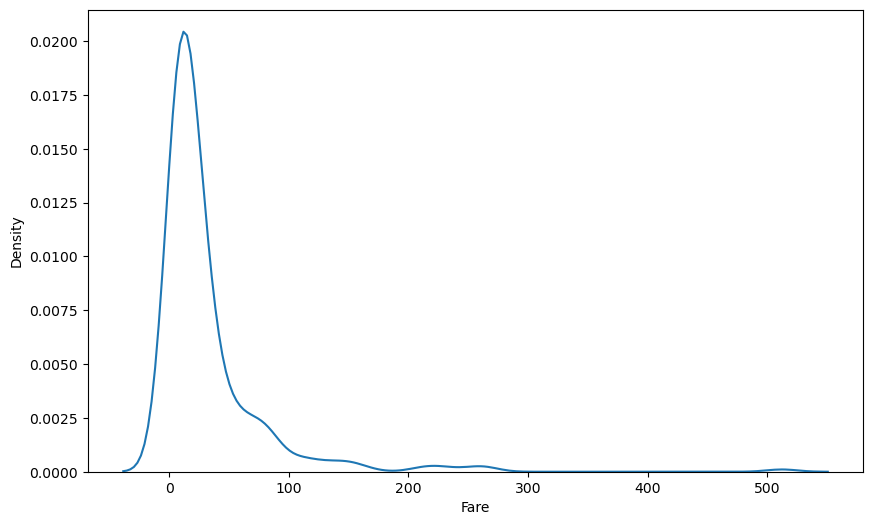

In [37]:
sns.kdeplot(data = df, x='Fare')
plt.show()

In [39]:
df['Fare'].skew()

4.787316519674893

* Positively Skewed Data

<Axes: xlabel='Fare'>

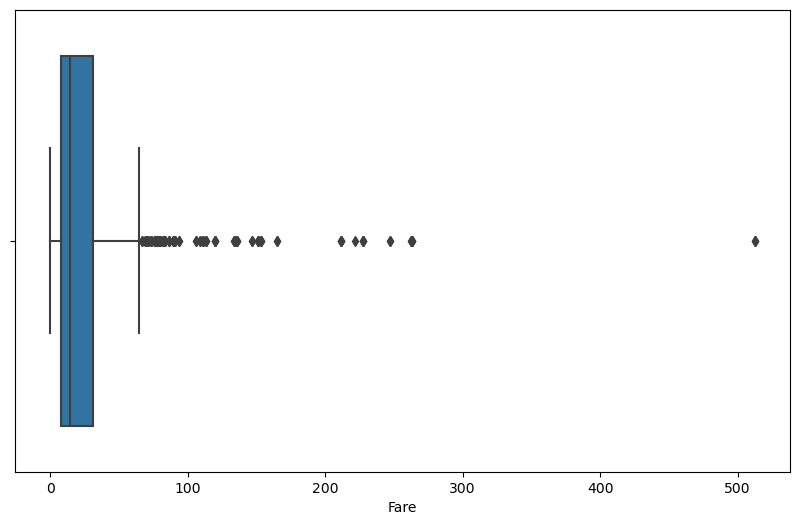

In [41]:
sns.boxplot(x='Fare', data = df)

* We see the presence of a lot of outliers

In [42]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [45]:
df[df['Fare']>31 + 1.5*(31-7.91)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


* We see that around 116 people have paid too much fair, but that could be due to high class passengers
* The fare for a family is added in the fare of each of the members
* We need to feature Engineer this

## Univariate Analysis of 'Survived'

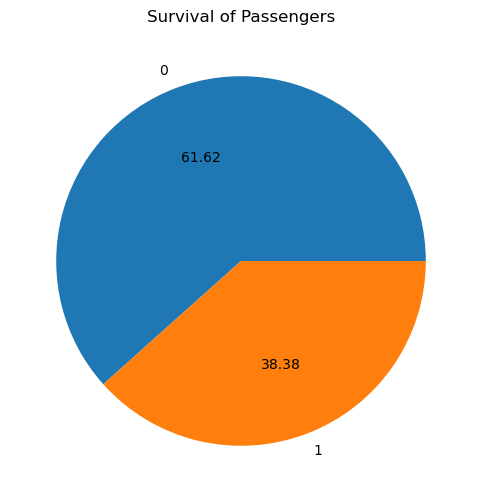

In [48]:
survival_count = df['Survived'].value_counts().values
survived_or_not = df['Survived'].value_counts().index
plt.pie(x=survival_count, labels = survived_or_not, autopct = '%1.2f')
plt.title('Survival of Passengers')
plt.show()

* More passenger died than survived

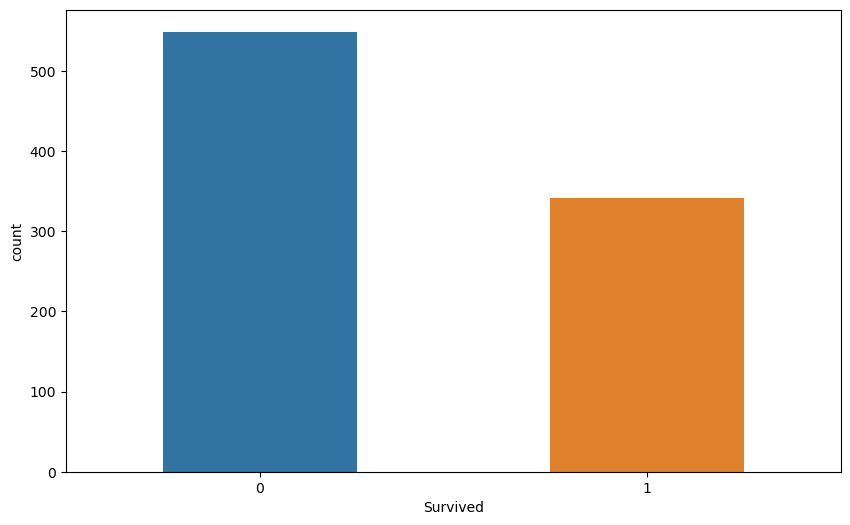

In [56]:
sns.countplot(x='Survived', data = df, width = 0.5)
plt.show()

## Univariate Analysis of Pclass

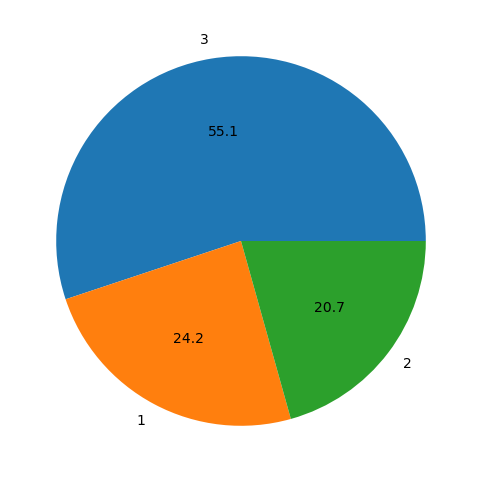

In [59]:
Classno = df['Pclass'].value_counts().values
Classnames = df['Pclass'].value_counts().index
plt.pie( x = Classno, labels = Classnames, autopct = '%1.1f')
plt.show()

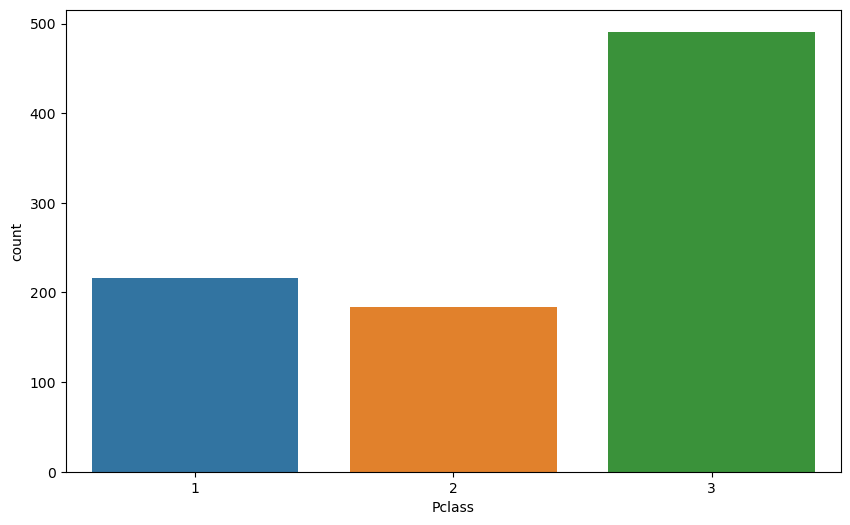

In [61]:
sns.countplot(x='Pclass', data = df)
plt.show()

* Most of the people travelled in 3rd Class
* Suprisingly More people in 1st class than 2nd class

## Bivariate Analysis of Pclass and Survival

In [66]:
Pclass_vs_Survival = pd.crosstab( df['Survived'], df['Pclass'], normalize = 'columns')*100
Pclass_vs_Survival

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


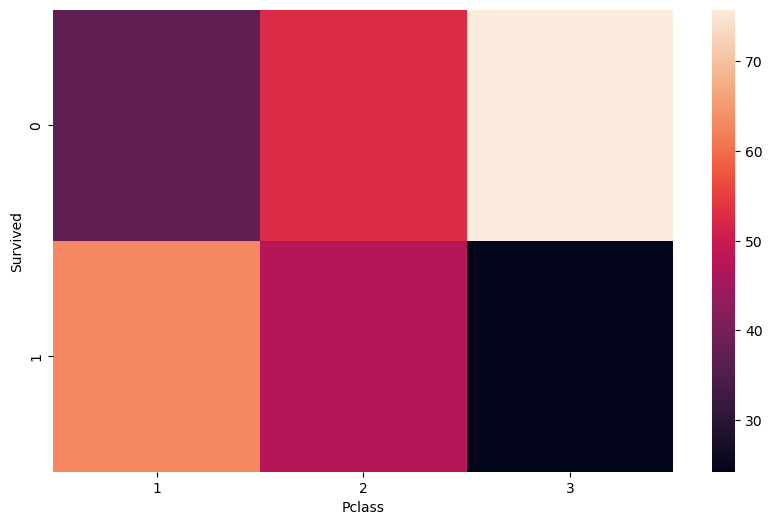

In [67]:
sns.heatmap(Pclass_vs_Survival)
plt.show()

* 76% of the passengers of class 3 died, whereas the number is only about 37% for class 1

## Bivariate Analysis of Sex vs Survived

In [70]:
Sex_vs_Survived = pd.crosstab(df['Survived'], df['Sex'], normalize = 'columns')*100
Sex_vs_Survived

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


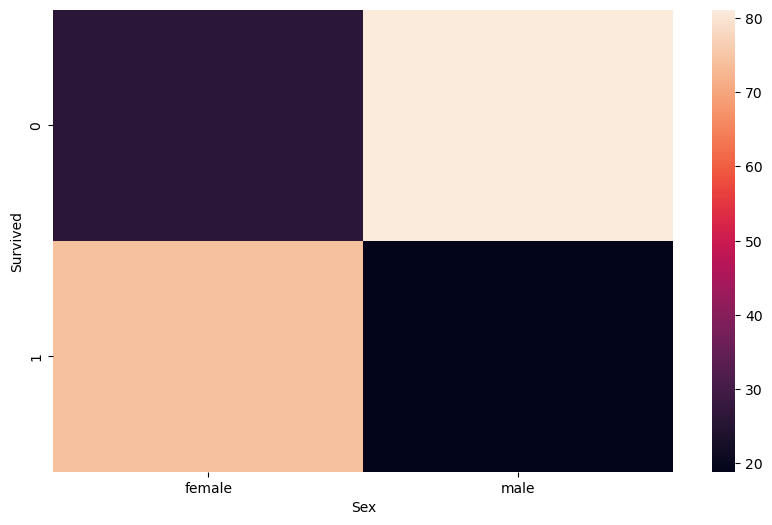

In [71]:
sns.heatmap(Sex_vs_Survived)
plt.show()

* More Percentage of females survived than men

## Bivariate Analysis of Embarked vs Survived

In [72]:
Embarked_vs_Survived = pd.crosstab(df['Survived'], df['Embarked'], normalize = 'columns')*100
Embarked_vs_Survived

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


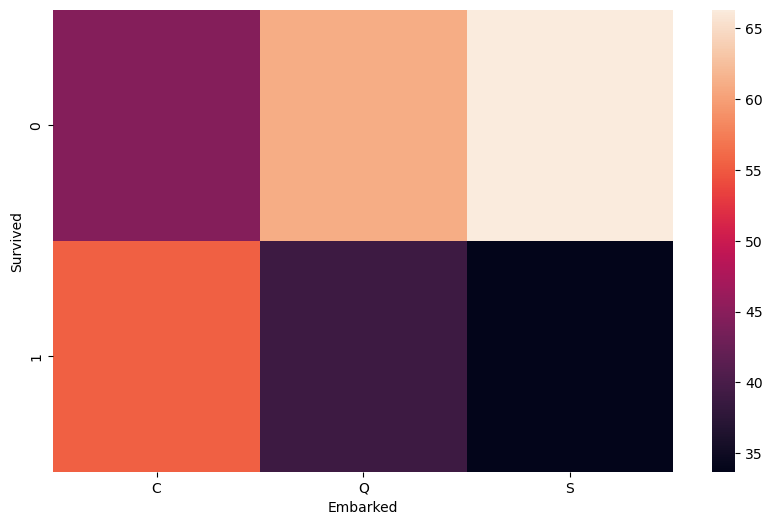

In [73]:
sns.heatmap(Embarked_vs_Survived)
plt.show()

* Although Percentage vise total Survived is greater for C, I do not want to see a pattern here

## Survived and Age

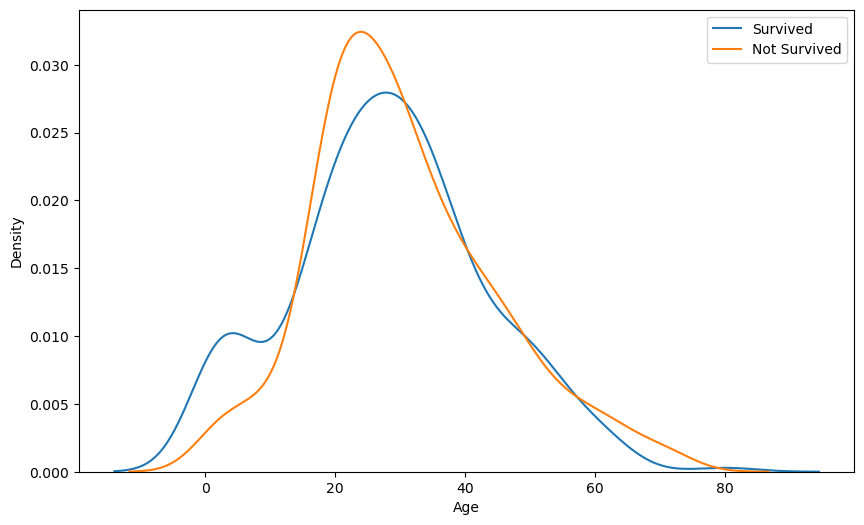

In [80]:
Survived_Age = df[df['Survived'] == 1]['Age']
Not_Survived_Age = df[df['Survived'] == 0]['Age']
sns.kdeplot(Survived_Age)
sns.kdeplot(Not_Survived_Age)
plt.legend(['Survived', 'Not Survived'])
plt.show()

* Survival of Children is More than Survival of adults